### Nome: Emanuel Piveta Pozzobon
#### Turma: GAMA
#### ID: 24039

#### _<center>Ilum - Escola de Ciência. Campinas, SP. 2024</center>_

------------

### Monstrinho 3.5 Forma, função e ativação

**Objetivo:**
Implemente 3 novas funções de ativação na rede neural feita em Python
puro nos vídeos da disciplina. Escreva brevemente sobre estas 3 funções de ativação,
mostrando a equação delas e comentando a diferença com relação à função de ativação
sigmoidal. Mostre que seu código funciona rodando alguns testes simples.

**Comentário:**
Aqui não é o lugar de inventar funções de ativação. Busque por funções
de ativação já existentes utilizadas em redes neurais

**Comentário 2:**
Observe que o enunciado diz claramente que é para realizar a tarefa
na rede neural feita em Python puro nos vídeos da disciplina. Se você está usando o
PyTorch, numpy, tensorflow, keras, lightning ou qualquer outra biblioteca pronta,
você está no caminho errado!

----


### Introdução (Função Sigmoid):

Primeiramente, nas aulas ministradas pelo professor, o código em python puro das redes neurais foi feito usando a função sigmoide como função ativação. Segue abaixo o seu cálculo e gráfico [1].

$$
F(x) = \dfrac{1}{1 + e^{-x}}
$$

A escolha de uma função de ativação é muito importante, pois segundo [2] esssas funções permitem que as redes neurais aprendam relações não lineares, introduzindo comportamentos não lineares por meio de funções de ativação que também sejam não lineares. Dessa forma, o comportamento dos dados, que normalmente apresentam comportamentos complexos e difíceis de modelar, redes neurais com funções de ativação apropriadas podem descrever bem esses dados. Segue abaixo o código em python feito em aula:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

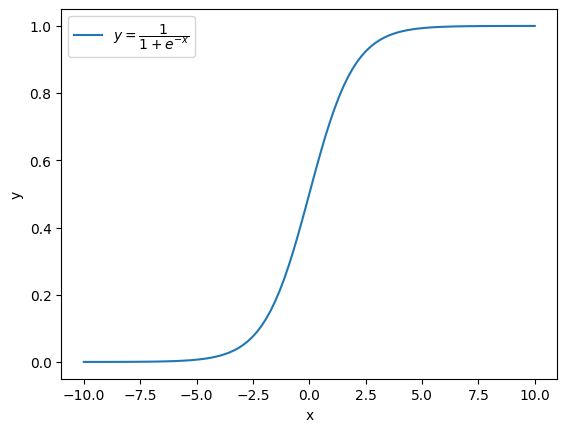

In [32]:
x_sig = np.linspace(-10, 10, 100)

def sigmoid(x):
    y = 1 / (1 + math.e**(-x))
    return y

plt.plot(x_sig, sigmoid(x_sig), label='$y=\\dfrac{1}{1+e^{-x}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

A seguir segue as células de código do docente Daniel Cassar que realizam uma rede neural:

In [33]:
from graphviz import Digraph


def _tracar(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    vertices = set()
    arestas = set()

    def construir(v):
        """Função recursiva para traçar o grafo."""
        if v not in vertices:
            vertices.add(v)
            for progenitor in v.progenitor:
                arestas.add((progenitor, v))
                construir(progenitor)

    construir(folha)

    return vertices, arestas


def plota_grafo(folha):
    """Função modificada da criada por Andrej Karpathy para construção de grafo.

    Referência: https://github.com/karpathy/micrograd

    """
    grafo = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    vertices, arestas = _tracar(folha)

    for v in vertices:
        id_vertice = str(id(v))

        if hasattr(v, "rotulo") and (hasattr(v, "grad")):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f} | grad {v.grad:.3f}" + " }"

        elif hasattr(v, "rotulo"):
            texto = "{ " + f"{v.rotulo} | data {v.data:.3f}" + " }"

        else:
            texto = "{ " + f"data {v.data:.3f}" + " }"

        grafo.node(name=id_vertice, label=texto, shape="record")

        if v.operador_mae:
            grafo.node(name=id_vertice + v.operador_mae, label=v.operador_mae)
            grafo.edge(id_vertice + v.operador_mae, id_vertice)

    for vertice1, vertice2 in arestas:
        grafo.edge(str(id(vertice1)), str(id(vertice2)) + vertice2.operador_mae)

    return grafo

In [34]:
import math

class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

É na classe Neuronio que é aplicada a função de ativação sigmoid

In [35]:
import random

#Construir um único neurônio
class Neuronio:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Valor(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.sig() #aplicação da função sigmoid na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [36]:
class Camada:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [37]:
class MLP:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [38]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [39]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 0.2

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = []
    for exemplo in x:
        previsao = minha_mlp(exemplo)
        y_pred.append(previsao)

    # loss
    erros = []
    for yt, yp in zip(y_true, y_pred):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros.append(erro_quadratico)        
    loss = sum(erros)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca, loss.data)

0 0.6873610036700541
1 0.672589077504962
2 0.6599917705194456
3 0.6494224872520832
4 0.6406709530281772
5 0.6334948269929082
6 0.6276461073911742
7 0.6228900232602259
8 0.6190163848445286
9 0.6158447093442074
10 0.6132249140611649
11 0.611035273615286
12 0.6091789770233774
13 0.6075802061437924
14 0.606180298842976
15 0.6049342946821985
16 0.6038079847645696
17 0.6027754818034607
18 0.6018172703106978
19 0.6009186722312496
20 0.6000686573293333
21 0.5992589314578991
22 0.5984832441268461
23 0.597736866414131
24 0.5970161995927861
25 0.596318483116622
26 0.595641577563147
27 0.5949838037847661
28 0.5943438240036631
29 0.5937205540815151
30 0.5931130988845258
31 0.5925207047122939
32 0.5919427243063167
33 0.5913785911154439
34 0.5908278003631168
35 0.5902898951064335
36 0.5897644559553126
37 0.5892510934734879
38 0.5887494425436924
39 0.5882591581711769
40 0.5877799123406039
41 0.5873113916447282
42 0.5868532954790037
43 0.5864053346517001
44 0.5859672302996536
45 0.5855387130294022
46 0

### Função de Ativação: Função Linear

Apesar da função linear, muitas vezes, não conseguir encontrar os padrões que buscamos, pois os padrões em dados normalmente seguem padrões não lineares. Vamos apresentar esse modelo, para fins educacionais, por ser mais simples.
Segundo a referência [2], a função linear é o tipo de função de ativação mais simples a qual é definida por:

$$
f(x) = x
$$

Seu gráfico segue abaixo. É visível que ela apenas retorna o mesmo número de input.

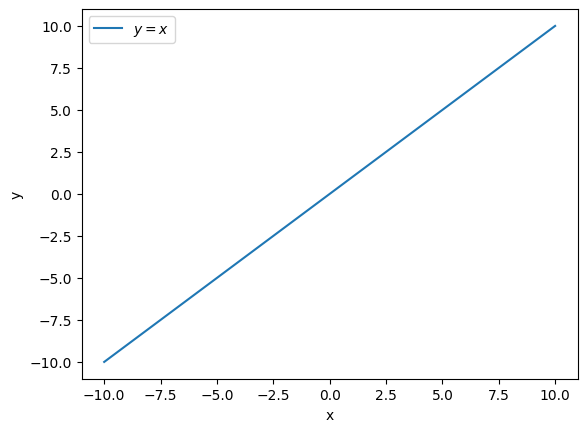

In [40]:
x_linear = np.linspace(-10, 10, 100)

def linear(x):
    y = x
    return y

plt.plot(x_linear, linear(x_linear), label='$y=x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos aplicar na classe Neurônio e Valor, e recalcular a rede neural com os outros parametros iguais.

In [41]:
import math

class Valor_linear:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor_linear):
            outro_valor = Valor_linear(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor_linear):
            outro_valor = Valor_linear(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor_linear(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def linear(self):
        """Realaza a operação: self"""
        return self
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [42]:
import random

#Construir um único neurônio
class Neuronio_linear:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Valor_linear(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Valor_linear(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.linear() #aplicação da função linear na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [43]:
class Camada_linear:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio_linear(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [44]:
class MLP_linear:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_linear(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [45]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp_linear = MLP_linear(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Apenas consegui um resultado aceitável quando reduzi a taxa de aprendizado para um número muito pequeno, diferentemente das outras funções de ativação, quando era possível colocar um valor mais alto para essa taxa. Se o leitor executar de novo o kernel com taxa de aprendizado igual 0.1 observará que a função não retornará mais números. 

In [46]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 10e-3
for epoca_linear in range(NUM_EPOCAS):
    # forward pass
    y_pred_linear = []
    for exemplo in x:
        previsao_linear = minha_mlp_linear(exemplo)
        y_pred_linear.append(previsao_linear)

    # loss
    erros_linear = []
    for yt, yp in zip(y_true, y_pred_linear):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros_linear.append(erro_quadratico)        
    loss_linear = sum(erros_linear)

    # zero grad
    for p in minha_mlp_linear.parametros():
        p.grad = 0

    # backpropagation
    loss_linear.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp_linear.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca_linear, loss_linear.data)

0 28.09154775799392
1 0.1732365222240724
2 0.08427072767908757
3 0.05354201245684323
4 0.04133268680871832
5 0.035962818084851564
6 0.03339943040251823
7 0.032071314766275685
8 0.031311293317394316
9 0.030819955908997512
10 0.03045851009819373
11 0.030161455664335923
12 0.029897575545211802
13 0.02965190053375015
14 0.029417212636435597
15 0.029190003396080244
16 0.02896854239977456
17 0.028751952349340724
18 0.02853976581538814
19 0.02833171279467277
20 0.028127618895860705
21 0.02792735654574255
22 0.027730821599028437
23 0.02753792211575644
24 0.027348572965063038
25 0.027162693218465577
26 0.026980204878814164
27 0.02680103224911043
28 0.026625101608238104
29 0.026452341034282373
30 0.026282680299176953
31 0.026116050798154905
32 0.02595238549648468
33 0.025791618885070956
34 0.025633686940854647
35 0.02547852709003493
36 0.025326078173140615
37 0.025176280411460146
38 0.025029075374575736
39 0.02488440594886049
40 0.024742216306854123
41 0.02460245187746269
42 0.024465059316940395

### Função de Ativação: Tangente Hiperbólica

Segundo a referência [2], há a função de ativação tanh, tangente hiperbólica, a qual é definida por:

$$
f(x) =\dfrac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Vamos ver o seu gráfico. No qual é visível que uma das suas principais diferenças da função sigmoide, é que a função tangente hiperbólica tem um intervalo definido como [-1, 1], enquanto a sigmoide era de [0, 1]

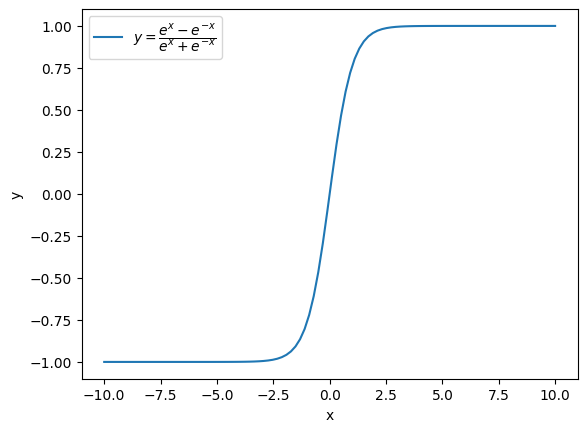

In [47]:
x_tanh = np.linspace(-10, 10, 100)

def tangente_hiperbolica(x):
    y = ((math.e**x) - (math.e**(-x)))/((math.e**x) + (math.e**(-x)))
    return y

plt.plot(x_tanh, tangente_hiperbolica(x_tanh), label='$y=\\dfrac{e^x - e^{-x}}{e^x + e^{-x}}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos aplicar na classe Neurônio e Valor, e recalcular a rede neural com os outros parametros iguais.

In [48]:
import math

class Valor_Tangente_Hiperbólica:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor_Tangente_Hiperbólica):
            outro_valor = Valor_Tangente_Hiperbólica(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor_Tangente_Hiperbólica(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor_Tangente_Hiperbólica):
            outro_valor = Valor_Tangente_Hiperbólica(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor_Tangente_Hiperbólica(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor_Tangente_Hiperbólica(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor_Tangente_Hiperbólica(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def tanh(self):
        """Realiza a operação: (exp(self) - exp(-self)) / exp(self) + exp(-self)"""
        return ((self).exp() - (-self).exp())/((self).exp() + (-self).exp())
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [49]:
import random

#Construir um único neurônio
class Neuronio_Tangente_Hiperbolica:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Valor_Tangente_Hiperbólica(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Valor_Tangente_Hiperbólica(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.tanh() #aplicação da função tangente hiperbolica na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [50]:
class Camada_Tangente_Hiperbolica:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio_Tangente_Hiperbolica(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [51]:
class MLP_Tangente_Hiperbolica:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_Tangente_Hiperbolica(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [52]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp_tangente_hiperbolica = MLP_Tangente_Hiperbolica(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Se o usuário colocar como taxa de aprendizado 10e-3 ou 0.1 irá funcionar com a função de ativação tangente hiperbólica

In [53]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 10e-3

for epoca_tanh in range(NUM_EPOCAS):
    # forward pass
    y_pred_tanh = []
    for exemplo in x:
        previsao_tanh = minha_mlp_tangente_hiperbolica(exemplo)
        y_pred_tanh.append(previsao_tanh)

    # loss
    erros_tanh = []
    for yt, yp in zip(y_true, y_pred_tanh):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros_tanh.append(erro_quadratico)        
    loss_tanh = sum(erros_tanh)

    # zero grad
    for p in minha_mlp_tangente_hiperbolica.parametros():
        p.grad = 0

    # backpropagation
    loss_tanh.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp_tangente_hiperbolica.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca_tanh, loss_tanh.data)

0 2.7738395878791287
1 2.2334729802663476
2 1.7649153774308215
3 1.4859147083039947
4 1.3429343504909512
5 1.2583205871555123
6 1.198975747701506
7 1.1522649605399322
8 1.112766402969843
9 1.0778539677644843
10 1.0461279990147507
11 1.016785523412139
12 0.9893383261518062
13 0.963474921561039
14 0.9389879091106437
15 0.9157334518979708
16 0.8936075979410001
17 0.8725319287599628
18 0.8524446158911089
19 0.8332947349859641
20 0.8150386040915163
21 0.7976374105142034
22 0.7810556724502546
23 0.7652602472740778
24 0.7502196993117967
25 0.735903903408759
26 0.722283801675119
27 0.7093312580141856
28 0.6970189734147533
29 0.685320437548512
30 0.674209900844882
31 0.6636623571346711
32 0.6536535309705926
33 0.6441598664026581
34 0.6351585157019121
35 0.6266273275693449
36 0.6185448349446379
37 0.610890242793708
38 0.603643416316497
39 0.5967848699584605
40 0.5902957574888179
41 0.5841578632659065
42 0.5783535946714736
43 0.5728659755773378
44 0.5676786406179285
45 0.5627758299834434
46 0.558

### Função de Ativação de ReLU (Unidade Linear Retificada)

Segundo a referência [2] a função Unidade Linear Retificada é definida como:

$$
f(x) = max(0, x)
$$

Dessa formal, ela retorna para valores negativos o valor de 0, e para valores positivos, ela atua como uma função linear $f(x) = x$, e mantêm os zeros. Sua visualização segue abaixo. O código foi adaptado da referência [3].

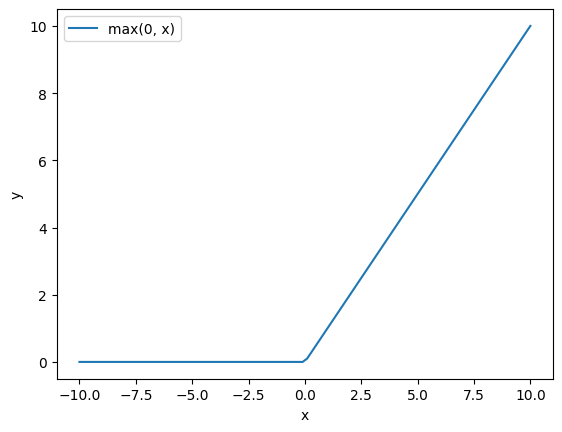

In [54]:
x_relu = np.linspace(-10, 10, 100)

def relu(data, epsilon=0):
    return np.maximum(epsilon * data, data)

plt.plot(x_relu, relu(x_relu), label='max(0, x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [55]:
class Unidade_Linear_Retificada:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Unidade_Linear_Retificada):
            outro_valor = Unidade_Linear_Retificada(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Unidade_Linear_Retificada(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Unidade_Linear_Retificada):
            outro_valor = Unidade_Linear_Retificada(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Unidade_Linear_Retificada(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Unidade_Linear_Retificada(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Unidade_Linear_Retificada(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def relu(self):
        progenitor = (self,)
        data = max(0, self.data)
        operador_mae = "ReLU"
        resultado = Unidade_Linear_Retificada(data, progenitor, operador_mae)
    
        def propagar_relu():
            self.grad += resultado.grad * (1.0 if self.data > 0 else 0.0)
    
        resultado.propagar = propagar_relu
    
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def tanh(self):
        """Realiza a operação: (exp(self) - exp(-self)) / exp(self) + exp(-self)"""
        return ((self).exp() - (-self).exp())/((self).exp() + (-self).exp())
    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [56]:
class Neuronio_Unidade_Linear_Retificada:
    '''
    -> função que calcula sigma(x) de um único neurônio
    
    __init__
    -> num_dados_entrada = 2, se eu tiver as informações h e f, olhe seu caderno
    -> self.vies = b
    -> self.pesos = w_1 e w_2 em uma lista
    
    __call__ = Neurônio(x)
    -> a própria instância da classe neurônio chama uma função em que x é uma lista contendo as informações que entrarão
    -> x = [h,f]
    
    '''
    
    # pq a função de ativação e as informações entrada também não devem ser ser computadas como instâncias da classe valor?
    def __init__(self, num_dados_entrada):
        self.vies = Unidade_Linear_Retificada(random.uniform(-1, 1)) #b
        
        self.pesos = [] #w1, w2
        for i in range(num_dados_entrada):
            self.pesos.append(Unidade_Linear_Retificada(random.uniform(-1, 1)))
            
    def __call__(self, x): #lista x contendo as informações
        #calcular o dado de sáida
        
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = soma.relu() #aplicação da função relu hiperbolica na soma
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

In [57]:
class Camada_Unidade_Linear_Retificada:
    '''
    -> função que monta uma fileira inteira de neurônio, por exemplo, na representação abaixo queremos montar os neurônios
    da camada Hidden Layer:
    
    Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios = número de neurônios necessários para construir a camada, na representação são 4.
    
    __call__
    -> computa todos os dados de saída da camada, se fosse montado a Hidden Layer, o output seria apenas y.
    
    '''
    
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            # Cria neurônio por neurônio usando a classe Neurônio
            neuronio = Neuronio_Unidade_Linear_Retificada(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
    
    # Função para computar todos os dados de saída da camada
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [58]:
class MLP_Unidade_Linear_Retificada:
    '''
    classe que constrói toda uma rede neural baseado nas classes anteriores
    
    -> num_dados_entrada = seriam as informações iniciais nos neurônios que não aplicam funções, 
    na representação abaixo é 4.
    
        Input Layer      Hidden Layer     Output Layer
    (x1)              (h1)             (y)
     O  -------------  O  -------------- O
    (x2)              (h2)             
     O  -------------  O  
    (x3)              (h3)  
     O  -------------  O  
    (x4)              (h4)  
     O  -------------  O  
     
    -> num_neuronios_por_camada = lista contendo em cada index o número de neurônios por camada, na representação acima
    seria [4, 1]
    
    __call__
    -> Contabiliza y da rede neural.
    '''
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):
        
        # o python concatena duas lista sendo somadas, no caso acima seria [4, 4, 1]
        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada_Unidade_Linear_Retificada(num_neuronios_por_camada[i], percurso[i])
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            # cada neurônio criado em Camadas receberá todas as informações de x
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

In [59]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

NUM_DADOS_DE_ENTRADA = 3  
NUM_DADOS_DE_SAIDA = 1    
CAMADAS_OCULTAS = [3, 2]  

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp_Unidade_Linear_Retificada = MLP_Unidade_Linear_Retificada(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Da mesma forma da função tangente hiperbólica, é possível colocar uma taxa de aprendizado 10e-3 ou 0.1 e terá um resultado aceitável.

In [60]:
NUM_EPOCAS = 200
TAXA_DE_APRENDIZADO = 10e-3

for epoca_relu in range(NUM_EPOCAS):
    # forward pass
    y_pred_relu = []
    for exemplo in x:
        previsao_relu = minha_mlp_Unidade_Linear_Retificada(exemplo)
        y_pred_relu.append(previsao_relu)

    # loss
    erros_relu = []
    for yt, yp in zip(y_true, y_pred_relu):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros_relu.append(erro_quadratico)        
    loss_relu = sum(erros_relu)

    # zero grad
    for p in minha_mlp_Unidade_Linear_Retificada.parametros():
        p.grad = 0

    # backpropagation
    loss_relu.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp_Unidade_Linear_Retificada.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado (opcional)
    print(epoca_relu, loss_relu.data)

0 2.8736899218012777
1 1.1255686372358995
2 1.122088702841238
3 1.1187577534607427
4 1.115563556328918
5 1.1124965144956043
6 1.1095484725833176
7 1.1067121932404043
8 1.103981111607441
9 1.1013492071196143
10 1.0988109265180055
11 1.0963611305751209
12 1.0939950528936593
13 1.0917082656889159
14 1.089496650203571
15 1.0873563705703329
16 1.0852838504513733
17 1.0832757520219007
18 1.081328956985341
19 1.0794405493750503
20 1.0776077999402627
21 1.07582815194417
22 1.074099208225174
23 1.0724187193910706
24 1.070784573031548
25 1.069194783847688
26 1.0676474846086506
27 1.0661409178556798
28 1.0646734282822898
29 1.0632434557271198
30 1.0618495287226783
31 1.0604902585491125
32 1.0591643337473846
33 1.057870515050873
34 1.0566076306985372
35 1.0553745720964438
36 1.0541702897976983
37 1.0529937897737567
38 1.0518441299526502
39 1.0507204170020086
40 1.0496218033368174
41 1.0485474843337235
42 1.0474966957353589
43 1.046468711229674
44 1.0454628401905965
45 1.0444784255675732
46 1.04351

### Conclusão: 

Foi possível alterar a função ativação sigmoid utilizada em aula, por outras 3 funções de ativação: linear, tangente hiperbólica e unidade linear retificada. É observável que isso causou uma certa diferença da função loss de acordo com a taxa de aprendizado. A função linear por exemplo, se testada com 0.1 de taxa de aprendizado não retorna mais números para o usuário, apenas com uma taxa bem pequena 10e-3 foi possível alcançar um resultado satisfatório. Nas outras funções, com uma taxa de aprendizado 0.1 ou 10e-3 foi possível conseguir um resultado aceitável. Destacando que dependendo da função de ativação escolhida, haverá diferença nos parâmetros e resultados obtidos. 

### Referências:

[1] GOOGLE DEVELOPERS. Funções de ativação. Disponível em: https://developers.google.com/machine-learning/crash-course/neural-networks/activation-functions?hl=pt-br. Acesso em: 12 jun. 2025.

[2] DATACAMP. Introdução às funções de ativação em redes neurais. Disponível em: https://www.datacamp.com/pt/tutorial/introduction-to-activation-functions-in-neural-networks. Acesso em: 12 jun. 2025.

[3] STACK OVERFLOW. Considerations for using ReLU as activation function. Disponível em: https://stackoverflow.com/questions/41539047/considerations-for-using-relu-as-activation-function. Acesso em: 12 jun. 2025.